In [140]:
import geopandas
import numpy as np
import pandas as pd
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
# If you choose to make a dynamic visualization for the homework
from matplotlib.animation import FuncAnimation
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.backends.backend_pdf import PdfPages

ndsoy_data = pd.read_csv("NDSoyProduction.csv",
                    index_col = [0, 1])
ndsoy_data.dropna()

,,county,production(bu)
fips_code,date,,
38027,2019,EDDY,"2,101,000"
38031,2019,FOSTER,"4,356,000"
38093,2019,STUTSMAN,"9,542,000"
38103,2019,WELLS,"5,972,000"
38003,2019,BARNES,"9,365,000"
...,...,...,...
38045,1989,LA MOURE,"188,000"
38047,1989,LOGAN,"4,200"
38073,1989,RANSOM,"260,700"


In [141]:
def import_ndsoy_data(filename, fips_code):
    # wheat data using read csv
    wheat_data = pd.read_csv("NDSoyProduction.csv",
                    index_col = [0, 1])

    ndsoy_data[fips_code] = ndsoy_data[fips_code].astype(int)
    ndsoy_data.set_index([fips_code, "date"], inplace = True)
    
    return ndsoy_data

ndsoy_data.dropna()

,,county,production(bu)
fips_code,date,,
38027,2019,EDDY,"2,101,000"
38031,2019,FOSTER,"4,356,000"
38093,2019,STUTSMAN,"9,542,000"
38103,2019,WELLS,"5,972,000"
38003,2019,BARNES,"9,365,000"
...,...,...,...
38045,1989,LA MOURE,"188,000"
38047,1989,LOGAN,"4,200"
38073,1989,RANSOM,"260,700"


In [142]:
def import_geo_data(filename, index_col = "Date", FIPS_name = "FIPS"):
    # import county level shapefile
    map_data = geopandas.read_file(filename = filename,                                   
                                   index_col = index_col)
    # rename fips code to match variable name in COVID-19 data
    map_data.rename(columns={"State":"state"},
                    inplace = True)
    # Combine statefips and county fips to create a single fips value
    # that identifies each particular county without referencing the 
    # state separately
    map_data[FIPS_name] = map_data["STATEFP"].astype(str) + \
        map_data["COUNTYFP"].astype(str)
    map_data[FIPS_name] = map_data[FIPS_name].astype(np.int64)
    # set FIPS as index
    map_data.set_index(FIPS_name, inplace=True)
    
    return map_data

FIPS_name = "fips_code"

In [143]:
map_data = import_geo_data(filename = "countiesWithStatesAndPopulation.shp",
                    index_col = "date", FIPS_name = fips_name)

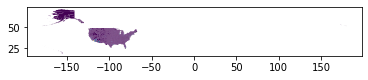

In [144]:
map_data.plot(column = "Population")

In [145]:
map_data

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,NAME,LSAD,ALAND,AWATER,Population,state,geometry
fips_code,,,,,,,,,,,
21007,21,007,00516850,0500000US21007,Ballard,06,639387454,69473325,7888.0,Kentucky,"POLYGON ((-89.18137 37.04630, -89.17938 37.053..."
21017,21,017,00516855,0500000US21017,Bourbon,06,750439351,4829777,19788.0,Kentucky,"POLYGON ((-84.44266 38.28324, -84.44114 38.283..."
21031,21,031,00516862,0500000US21031,Butler,06,1103571974,13943044,12879.0,Kentucky,"POLYGON ((-86.94486 37.07341, -86.94346 37.074..."
21065,21,065,00516879,0500000US21065,Estill,06,655509930,6516335,14106.0,Kentucky,"POLYGON ((-84.12662 37.64540, -84.12483 37.646..."
21069,21,069,00516881,0500000US21069,Fleming,06,902727151,7182793,14581.0,Kentucky,"POLYGON ((-83.98428 38.44549, -83.98246 38.450..."
...,...,...,...,...,...,...,...,...,...,...,...
31073,31,073,00835858,0500000US31073,Gosper,06,1186616237,11831826,1990.0,Nebraska,"POLYGON ((-100.09510 40.43866, -100.08937 40.4..."
39075,39,075,01074050,0500000US39075,Holmes,06,1094405866,3695230,43960.0,Ohio,"POLYGON ((-82.22066 40.66758, -82.19327 40.667..."
48171,48,171,01383871,0500000US48171,Gillespie,06,2740719114,9012764,26988.0,Texas,"POLYGON ((-99.30400 30.49983, -99.28234 30.499..."


In [146]:
dates =["2019",
        "2018",
        "2017",
        "2016",
        "2015",
        "2014",
        "2013",
        "2012",
        "2011",
        "2010",
        "2009",
        "2008",
        "2007",
        "2006",
        "2005",
        "2004",
        "2003",
        "2002",
        "2001",
        "2000",
        "1999",
        "1998",
        "1997",
        "1996",
        "1995",
        "1994",
        "1993",
        "1992",
        "1991",
        "1990",
        "1989"]

In [152]:
def create_ndsoy_geo_dataframe(ndsoy_data, map_data, dates):
    # create geopandas dataframe with multiindex for date
    # original geopandas dataframe had no dates, so copies of the df are 
    # stacked vertically, with a new copy for each date in the ndsoy_data index
    #(dates is a global)
    data_frame_initialized = False
    counties = ndsoy_data.groupby("fips_code").mean().index
    for date in dates:
        # select county observations from each date in dates
        # select only the subset of counties in the map that
        # are also present in the covid_data
        agg_df = map_data.loc[counties]
        agg_df["date"] = date
        if data_frame_initialized == False:
            #Create new dataframe
            matching_gpd = geopandas.GeoDataFrame(agg_df, crs = map_data.crs)
            data_frame_initialized = True        
        
        else:
            # or stack thenew  data frame and the dataframe that was initialized at
            # i = 0
            matching_gpd = matching_gpd.append(agg_df, ignore_index = False)
    # reset index, then set to [fips, date]
    matching_gpd.reset_index(inplace=True)
    matching_gpd.set_index(["fips_code", "date"], inplace = True)
    
    for key, val in wheat_data.items():
        matching_gpd[key] = val
    return matching_gpd

# dates will be used to create a geopandas DataFrame with multiindex 
dates = sorted(list(set(ndsoy_data.index.get_level_values("date"))))
ndsoy_data = create_ndsoy_geo_dataframe(ndsoy_data, map_data, dates)

DataError: No numeric types to aggregate

In [148]:
ndsoy_data

,,county,production(bu)
fips_code,date,,
38027,2019,EDDY,"2,101,000"
38031,2019,FOSTER,"4,356,000"
38093,2019,STUTSMAN,"9,542,000"
38103,2019,WELLS,"5,972,000"
38003,2019,BARNES,"9,365,000"
...,...,...,...
38045,1989,LA MOURE,"188,000"
38047,1989,LOGAN,"4,200"
38073,1989,RANSOM,"260,700"
